In [1]:
import simexpal
import yaml

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

for r in sorted(results, key=lambda r: (r['num_threads'])):
    print('num_threads {} has answer {} and takes: {} ms'.format(
          r['num_threads'], r['result'], r['time']))

num_threads 1 has answer 66588407 and takes: 14643 ms
num_threads 2 has answer 132144418 and takes: 41185 ms
num_threads 4 has answer 260219026 and takes: 116563 ms
num_threads 8 has answer 504677655 and takes: 150396 ms
num_threads 16 has answer 950037314 and takes: 288376 ms
num_threads 32 has answer 1689915615 and takes: 512943 ms
num_threads 64 has answer 18446744072129522982 and takes: 851142 ms


In [2]:
num_threads = []
result = []
time = []
for r in sorted(results, key=lambda r: (r['num_threads'])):
    num_threads.append(r['num_threads'])
    result.append(r['result'])
    time.append(r['time'])
    

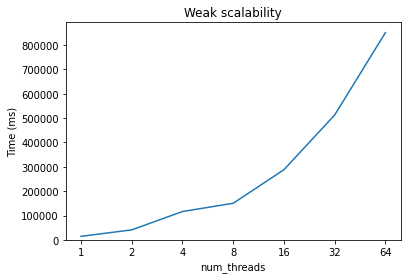

In [3]:
import matplotlib.pyplot as plt
fig, plts = plt.subplots()
plts.plot(num_threads, time)
plts.set_ylim(ymin=0)
plts.set_title('Weak scalability')
plts.set_ylabel('Time (ms)')
plts.set_xlabel('num_threads')
plts.set_xscale('log', base=2)
plts.set_xticks([1, 2, 4, 8, 16, 32, 64])
plts.set_xticklabels([1, 2, 4, 8, 16, 32, 64])
fig.savefig('plot_5c.pdf')